In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 插播: 在 `matplotlib` 中顯示中文

這裡參考 Mosky 在, 比如說[這裡](https://github.com/moskytw/hypothesis-testing-with-python)的做法。

如果明明有的字型, `matplotlib` 說找不到的話, 有可能需要讓 `matplotlib` 清掉原本的 cache。

    !rm -rf {mpl.get_cachedir()}
    matplotlib.font_manager._rebuild()

In [2]:
import matplotlib as mpl

使用 Google `Noto Sans CJK TC` 字型, 請到[這裡](https://www.google.com/get/noto/#sans-hant)下載。

In [3]:
mpl.rc('font', family='Noto Sans CJK TC')

如果你很好奇有什麼字型可以用...

    [f.name for f in mpl.font_manager.fontManager.ttflist]

In [4]:
[f.name for f in mpl.font_manager.fontManager.ttflist]

['STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'cmsy10',
 'cmmi10',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Serif Display',
 'cmr10',
 'cmex10',
 'cmtt10',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmb10',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmss10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'Noto Serif CJK TC',
 'Noto Sans CJK TC',
 'System Font',
 'Trebuchet MS',
 '.SF NS Display Condensed',
 'STIXSizeThreeSym',
 '.SF NS Rounded',
 'System Font',
 'Noto Sans Mono CJK JP',
 'System Font',
 'Apple Braille',
 'Noto Sans CJK TC',
 'STIXNonUnicode',
 'DIN Alternate',
 'Bitstream Vera Sans Mono',
 'Verdana',
 'N

## 05-01 暖身來個比較「正規」的資料

### 一些 Open Data

* [政府資料開放平台](https://data.gov.tw)
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

我們這暖身找一個全台大學生人數的數據集, 我們目標是看出各校「女生:男生」比例, 選出最高的前 20 名。

這裡要為大家示範的是, 也許就這麼簡單的事, 可能會花你一些工夫去做。


In [5]:
df = pd.read_csv('http://stats.moe.gov.tw/files/detail/107/107_student.csv')

In [6]:
df.head()

,大專校院校別學生數,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,107 學年度 SY2018-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,學校代碼,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,一年級男生,一年級女生,二年級男生,...,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別
2,0001,國立政治大學,D 日,D 博士,965,551,414,96,85,82,...,71,52,58,46,74,40,-,-,30 臺北市,1 一般
3,0001,國立政治大學,D 日,M 碩士,"3,998","1,854","2,144",624,742,632,...,-,-,-,-,-,-,-,-,30 臺北市,1 一般
4,0001,國立政治大學,D 日,B 學士,"9,630","3,983","5,647",899,"1,287",890,...,-,-,-,-,-,-,326,463,30 臺北市,1 一般


#### 把表格弄對

欄位名稱被放到第 1 列, 真正要的資料從第二列開始!

In [12]:
colnames = df.loc[1].values

In [14]:
df = df[2:]

In [15]:
df.head()

,大專校院校別學生數,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
2,0001,國立政治大學,D 日,D 博士,965,551,414,96,85,82,...,71,52,58,46,74,40,-,-,30 臺北市,1 一般
3,0001,國立政治大學,D 日,M 碩士,"3,998","1,854","2,144",624,742,632,...,-,-,-,-,-,-,-,-,30 臺北市,1 一般
4,0001,國立政治大學,D 日,B 學士,"9,630","3,983","5,647",899,"1,287",890,...,-,-,-,-,-,-,326,463,30 臺北市,1 一般
5,0001,國立政治大學,N 職,M 碩士,"1,750",896,854,303,248,253,...,53,47,-,-,-,-,-,-,30 臺北市,1 一般
6,0002,國立清華大學,D 日,D 博士,"1,664","1,221",443,225,99,201,...,158,50,112,43,168,58,-,-,18 新竹市,1 一般


In [17]:
df.columns = colnames

In [20]:
df.head()

,學校代碼,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,一年級男生,一年級女生,二年級男生,...,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別
2,0001,國立政治大學,D 日,D 博士,965,551,414,96,85,82,...,71,52,58,46,74,40,-,-,30 臺北市,1 一般
3,0001,國立政治大學,D 日,M 碩士,"3,998","1,854","2,144",624,742,632,...,-,-,-,-,-,-,-,-,30 臺北市,1 一般
4,0001,國立政治大學,D 日,B 學士,"9,630","3,983","5,647",899,"1,287",890,...,-,-,-,-,-,-,326,463,30 臺北市,1 一般
5,0001,國立政治大學,N 職,M 碩士,"1,750",896,854,303,248,253,...,53,47,-,-,-,-,-,-,30 臺北市,1 一般
6,0002,國立清華大學,D 日,D 博士,"1,664","1,221",443,225,99,201,...,158,50,112,43,168,58,-,-,18 新竹市,1 一般


In [25]:
undergraduate = df[(df['日間∕進修別'] == 'D 日') & (df['等級別']  == 'B 學士')]

In [26]:
undergraduate.head()

,學校代碼,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,一年級男生,一年級女生,二年級男生,...,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別
4,0001,國立政治大學,D 日,B 學士,"9,630","3,983","5,647",899,"1,287",890,...,-,-,-,-,-,-,326,463,30 臺北市,1 一般
8,0002,國立清華大學,D 日,B 學士,"8,689","4,696","3,993","1,089",865,"1,087",...,-,-,-,-,-,-,286,166,18 新竹市,1 一般
13,0003,國立臺灣大學,D 日,B 學士,"16,604","9,447","7,157","2,126","1,525","2,110",...,184,98,126,61,102,35,671,537,30 臺北市,1 一般
17,0004,國立臺灣師範大學,D 日,B 學士,"8,079","3,583","4,496",846,"1,066",850,...,-,-,-,-,-,-,240,271,30 臺北市,3 師範
21,0005,國立成功大學,D 日,B 學士,"11,390","7,123","4,267","1,672","1,010","1,651",...,82,68,49,27,53,21,355,149,21 臺南市,1 一般


![view 和 copy](images/pandas_view_copy.png)

注意接下來我們用了 `copy`, 你可能感覺好像不需要用, 事實上沒有用也可以執行, 只是 `pandas` 會警告你...

這牽涉大概每個用 `pandas` 的人, 都會碰到的 SettingWithCopyWarning!

請參考[這個影片](https://youtu.be/4R4WsDJ-KVc), 理解要怎麼解決。事實上這是一個非常棒的 `pandas` 系列教學!

In [29]:
df2 = undergraduate.loc[:, '學校名稱':'女生計'].copy()

In [31]:
df2.head()

,學校名稱,日間∕進修別,等級別,總計,男生計,女生計
4,國立政治大學,D 日,B 學士,"9,630","3,983","5,647"
8,國立清華大學,D 日,B 學士,"8,689","4,696","3,993"
13,國立臺灣大學,D 日,B 學士,"16,604","9,447","7,157"
17,國立臺灣師範大學,D 日,B 學士,"8,079","3,583","4,496"
21,國立成功大學,D 日,B 學士,"11,390","7,123","4,267"


#### 有逗點數字的修正

我們來修正一下有逗點的數字...

In [32]:
import locale

# atof

In [34]:
locale.setlocale(locale.LC_NUMERIC, '')

'zh_TW.UTF-8'

In [35]:
df2['男生計'] = df2['男生計'].apply(locale.atof)

In [36]:
df2['女生計'] = df2['女生計'].apply(locale.atof)

#### 終於可以算了!

In [42]:
df2['女男比例'] = df2.女生計 / df2.男生計

In [43]:
df2.head()

,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,女男比例
4,國立政治大學,D 日,B 學士,"9,630",3983.0,5647.0,1.417776
8,國立清華大學,D 日,B 學士,"8,689",4696.0,3993.0,0.850298
13,國立臺灣大學,D 日,B 學士,"16,604",9447.0,7157.0,0.757595
17,國立臺灣師範大學,D 日,B 學士,"8,079",3583.0,4496.0,1.254814
21,國立成功大學,D 日,B 學士,"11,390",7123.0,4267.0,0.599045


#### 找出前 20 名

找出女男比例最高前 20 所大學, 並且畫出圖來!

In [45]:
df3 = df2.sort_values(by = ['女男比例'], ascending=False)

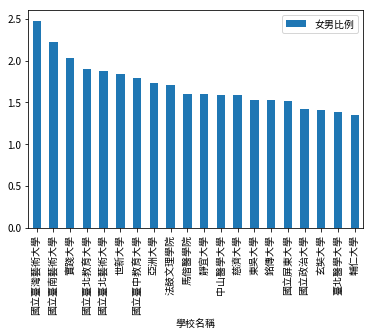

In [46]:
df3[:20].plot.bar(x='學校名稱', y=['女男比例'])

## 05-02 例子、例子、例子

### 我的 Mac 有沒有好棒棒

In [47]:
df = pd.read_html('https://browser.geekbench.com/mac-benchmarks')

In [48]:
len(df)

2

In [50]:
mac = df[0]

In [51]:
mac.head()

,Mac,Score,Unnamed: 2
0,iMac (27-inch Retina Mid 2017) Intel Core i7-7...,5684,NaN
1,Mac mini (Late 2018) Intel Core i7-8700B @ 3.2...,5659,NaN
2,MacBook Pro (15-inch Mid 2018) Intel Core i9-8...,5347,NaN
3,iMac Pro (Late 2017) Intel Xeon W-2150B @ 3.0 ...,5320,NaN
4,iMac (27-inch Retina Late 2015) Intel Core i7-...,5282,NaN


In [53]:
mac[mac.Mac.str.contains('Mid 2018')]

,Mac,Score,Unnamed: 2
2,MacBook Pro (15-inch Mid 2018) Intel Core i9-8...,5347,NaN
10,MacBook Pro (13-inch Mid 2018) Intel Core i7-8...,5138,NaN
13,MacBook Pro (15-inch Mid 2018) Intel Core i7-8...,5054,NaN
14,MacBook Pro (15-inch Mid 2018) Intel Core i7-8...,4926,NaN
22,MacBook Pro (13-inch Mid 2018) Intel Core i5-8...,4523,NaN


In [54]:
mac[mac.Score > 5347]

,Mac,Score,Unnamed: 2
0,iMac (27-inch Retina Mid 2017) Intel Core i7-7...,5684,NaN
1,Mac mini (Late 2018) Intel Core i7-8700B @ 3.2...,5659,NaN


### 大樂透

In [55]:
df = pd.read_html('http://www.9800.com.tw/statistics.asp')

In [56]:
len(df)

7

In [67]:
df_lot = df[3]

In [68]:
colnames = df_lot.loc[1].values

In [69]:
df_lot = df_lot.loc[2:]

In [70]:
df_lot.columns = colnames

In [71]:
df_lot.head()

,期次,開獎日期,球號,特號,單雙,和值,均值,同尾,連號,首尾差,尾數和,首數和,nan,nan,nan,nan,nan
2,108011,2019-02-02,02,07,22,35,46,49,41,3:3,161,26,2尾(2),NaN,47.0,31.0,13.0
3,108012,2019-02-03,12,24,28,36,37,40,6,1:5,177,29,NaN,3637,28.0,27.0,15.0
4,108013,2019-02-04,06,08,24,32,34,36,49,0:6,140,23,"4尾(2), 6尾(2)",NaN,30.0,30.0,11.0
5,108014,2019-02-05,13,18,30,34,45,49,33,3:3,189,31,NaN,NaN,36.0,29.0,16.0
6,108015,2019-02-06,17,23,28,29,32,39,12,4:2,168,28,9尾(2),2829,22.0,38.0,13.0


## 05-03 正式開始

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 05-04 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

#### 資料畫出來

要畫個圖很容易。

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

## 05-05 一些基本的資料分析

算平均。

算標準差。

不如就該算的都幫我們算算...

有時我們很愛看的相關係數矩陣。

只算兩科間的相關係數當然也可以。

## 05-06 增加一行

### 【技巧】

我們增加一行, 加入總級分。

### 【技巧】

有計算的當然也可以的。

## 05-07 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

### 【重點】排序的方法

加權分最高, 同分才看總級分

### 【重點】重設 index

## 05-08 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

## 05-09 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

### 【重點】刪掉一列

聰明的你是不是想到, 那直接篩出我們要留的就好了啊!

## 05-10 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader
    
要注意這些指令是要在終端機下的, 如果堅持不要離開 Jupyter Notebook 的安裝, 可以用:

    !conda install pandas-datareader -y
    
你要記得下達 `-y` 這個動作, 不然你的電腦會永遠在那等你按 `y`, 但你其實按不了...

我們把這個檔案以 `aapl.csv` 存起來, 之後可以這樣讀入。

    df = pd.read_csv('dataset/aapl.csv', index_col="Date")

#### 只要最後 240 個交易日!

#### 20 日的移動平均

#### 20 日和 60 日的移動平均

## 05-11 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

前面我們弄得亂七八糟的 index 重設一下。

#### 横向的貼

等等, 這大小好像不太對也可以嗎? 答案是可以的!

#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)